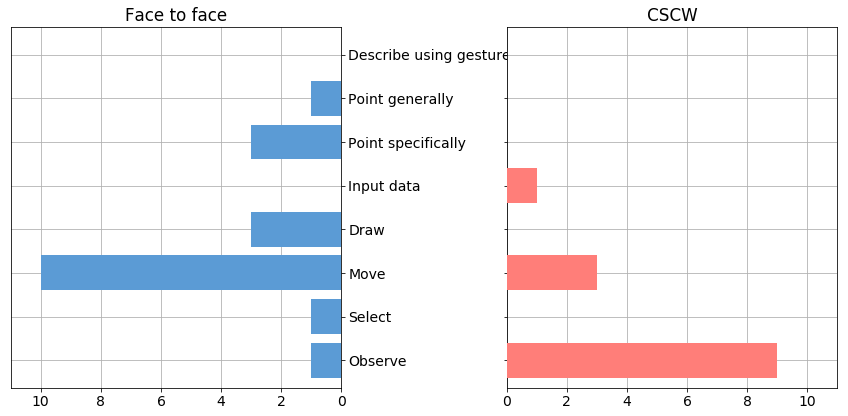

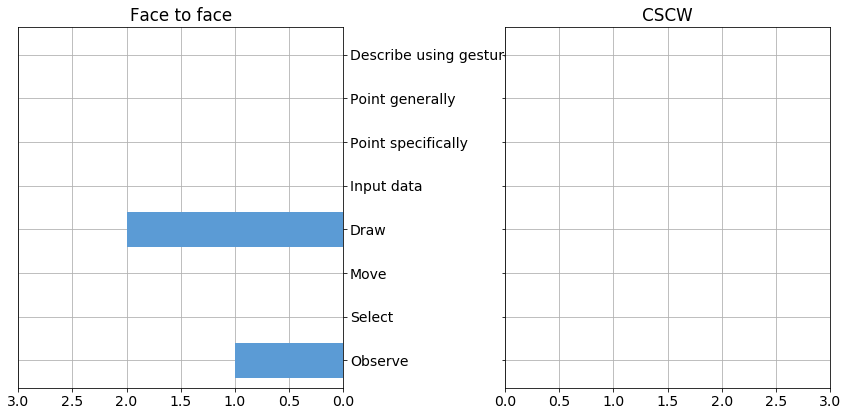

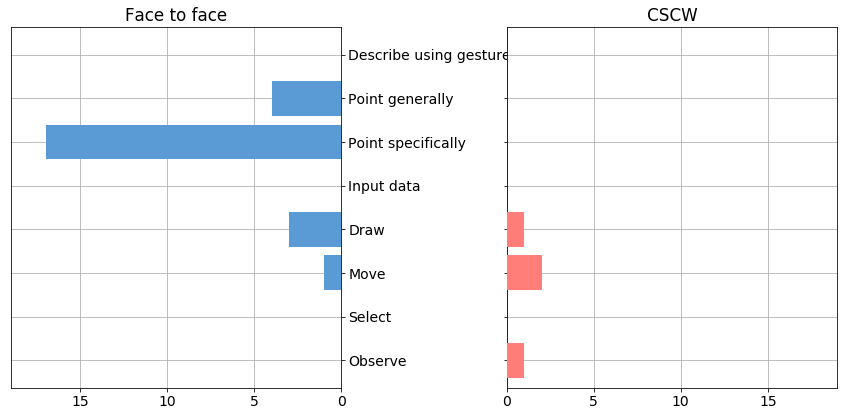

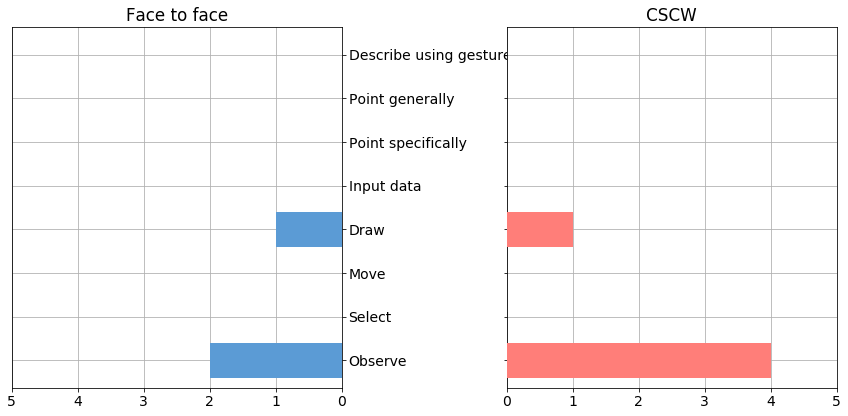

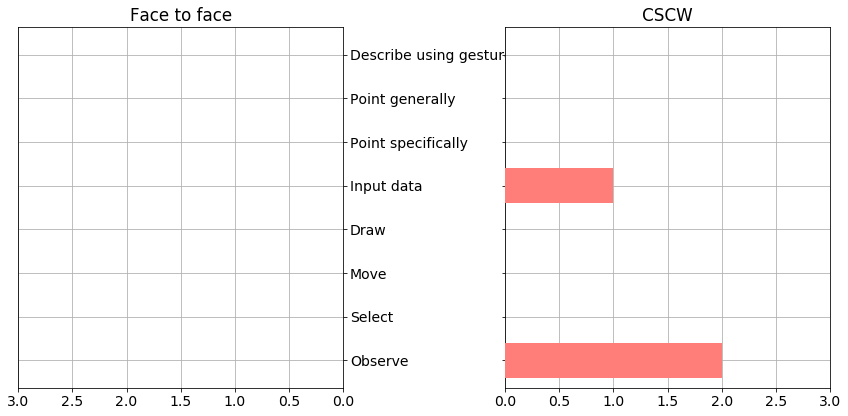

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':14})
import matplotlib.pyplot as plt 
countSubplot = 1
plt.rcParams["figure.figsize"]=[12,6*countSubplot]
colorF2F = '#5b9bd5'
colorCSCW = '#ff7e79'

# read data from csv file
decodef = lambda x: x.decode("utf-8")
data = np.genfromtxt('userResearch_encodedData.csv', delimiter=',', skip_header=0,
	names=True, dtype='U4,U5,U18,U8,U30', converters={1: decodef})

labelActionMode = ['Observe', 'Select', 'Move', 'Draw', 'Input data', 'Point specifically', 'Point generally', 'Describe using gesture']
labelReferece = ['Object', 'Scale', 'Position', 'Event', 'Time']

occurenceF2F = [[0 for k in range(len(labelActionMode))] for j in range(len(labelReferece))]
occurenceCSCW = [[0 for k in range(len(labelActionMode))] for j in range(len(labelReferece))]

# link action mode to deixis reference
for i in range(len(data)):
	# F2F
	if 'F2F' in data[i][0]:
		for j in range(len(labelReferece)):
			if labelReferece[j] in data[i][3]:
				for k in range(len(labelActionMode)):
					if labelActionMode[k] in data[i][2]:
						occurenceF2F[j][k] += 1
	# CSCW
	elif 'CSCW' in data[i][0]:
		for j in range(len(labelReferece)):
			if labelReferece[j] in data[i][3]:
				for k in range(len(labelActionMode)):
					if labelActionMode[k] in data[i][2]:
						occurenceCSCW[j][k] += 1

# plot double-sided bar chart
y = range(len(labelActionMode))
xRange = 1

for i in range(len(labelReferece)):
	fig, axes = plt.subplots(ncols=2, sharey=True)
	axes[0].barh(y, occurenceF2F[i], align='center', color=colorF2F, zorder=10)
	axes[0].set(title='Face to face')
	axes[1].barh(y, occurenceCSCW[i], align='center', color=colorCSCW, zorder=10)
	axes[1].set(title='CSCW')

	# use the same x axes range in two-sided plots to retain data integrity
	xRange = max(axes[0].get_xlim(), axes[1].get_xlim())
	xRange = round(xRange[1])+1
	axes[0].set_xlim(0, xRange)
	axes[1].set_xlim(0, xRange)
	# print (xRange)

	axes[0].invert_xaxis()
	axes[0].set(yticks = y, yticklabels = labelActionMode)
	axes[0].yaxis.tick_right()

	for ax in axes.flat:
	    ax.margins(0.03)
	    ax.grid(True)

	fig.tight_layout()
	fig.subplots_adjust(wspace=0.5)
	# plt.show()
	plt.savefig(labelReferece[i]+'.png', bbox_inches='tight')